In [1]:
import os

# Make sure you're in D:/Github/Aquimod2/notebooks
os.chdir("..")  # Go up to the project root

print("Current working directory:", os.getcwd())


Current working directory: D:\Github\Aquimod2


In [5]:
from utils.aquimod2_helpers import (
    run_aquimod2
)

In [9]:
scenario_path = os.path.abspath(os.path.join("scenarios", "CHexample"))
aquimod_exe_path = os.path.abspath("AquiMod2.exe")  # Must match actual location

print("Scenario path:", scenario_path)
print("AquiMod2 path:", aquimod_exe_path)


Scenario path: D:\Github\Aquimod2\scenarios\CHexample
AquiMod2 path: D:\Github\Aquimod2\AquiMod2.exe


In [26]:
run_aquimod2(aquimod_exe_path, scenario_path)

Running AquiMod2 in: D:\Github\Aquimod2\scenarios\CHexample
Simulation completed successfully.
Output: 

Running 1 times...

complete.

Model run time = 0 seconds.





In [22]:
from utils.aquimod2_helpers import run_aquimod2, load_gwl_output, plot_gwl_results
import pandas as pd

In [18]:
output_file = os.path.join(scenario_path, "Output", "Q3K3S1_TimeSeries1.out")
df = pd.read_csv(output_file, sep=r'\s+')
df.head()

,Day,Month,Year,Q_3(m3/d),Q_2(m3/d),Q_1(m3/d),GWL(m)
0,31,1,1961,0.000000,0.00000,0.00000,70.6650
1,28,2,1961,9.012580,7.78751,1.49854,57.4391
2,31,3,1961,1.202350,4.62700,1.25697,51.7685
3,30,4,1961,0.078119,3.27193,1.15340,48.2810
4,31,5,1961,0.000000,2.11742,1.08970,45.7146


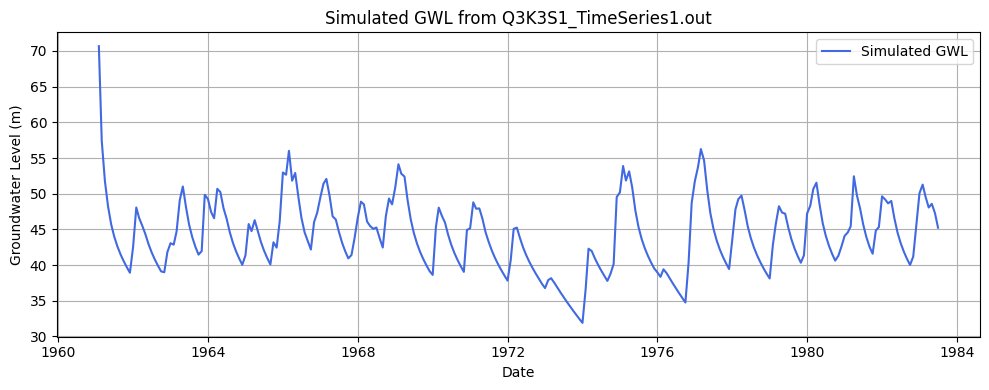

In [17]:
# Combine columns into a datetime
df["Date"] = pd.to_datetime(df[["Year", "Month", "Day"]])

# Plot GWL over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(df["Date"], df["GWL(m)"], label="Simulated GWL", color="royalblue")
plt.xlabel("Date")
plt.ylabel("Groundwater Level (m)")
plt.title("Simulated GWL from Q3K3S1_TimeSeries1.out")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
import importlib
import utils.aquimod2_helpers

importlib.reload(utils.aquimod2_helpers)

from utils.aquimod2_helpers import (
    run_aquimod2,
    load_component_gwl_output,
    plot_gwl_results,
    update_output_flags
)


In [25]:
from utils.aquimod2_helpers import update_output_flags

input_path = os.path.join(scenario_path, "Input.txt")
update_output_flags(input_path, new_flags="Y Y Y")


Updated output flags to: Y Y Y


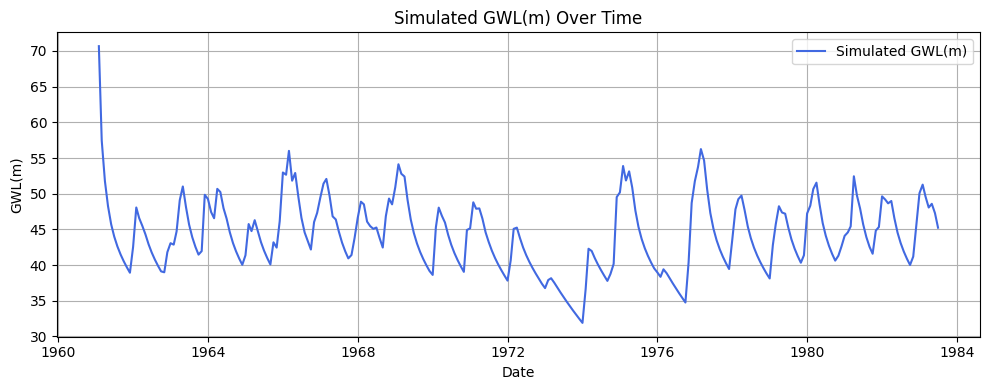

In [34]:
# Load from Q3K3S1_TimeSeries1.out
df = load_component_gwl_output(scenario_path, component_file="Q3K3S1_TimeSeries1.out")

# Plot GWL
plot_gwl_results(df, column="GWL(m)")